# Coursework - 1 

## Preparing Dataset

Importing Necessary Library

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

Pulling Data

In [3]:
coursework_data = pd.read_csv('coursework1.csv')

In [4]:
coursework_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In this dataset, data points are for local authorities that have different populations. Therefore, I normalize datasets to eliminate effect of population. 
Increase_rate : Difference between number of cases 2008-2018 if all areas have 100.000 population
Budget categories normalized in a way showing average annual spend per 100.000 people 

In [5]:
coursework_data.rename(columns={'2008_cases_total' : 'cases2008', '2018_cases_total' : 'cases2018',
                                '2018_pop_total' : 'pop2018', '2008_pop_total' : 'pop2008'}, inplace=True)
# Getting response variable (Increase of cases during 10 years)
c_d = coursework_data
increase_rate = (c_d.cases2018/c_d.pop2018 - c_d.cases2008/c_d.pop2008)*100000

# Getting average budget spend per 100.000 people in each category and each area between 2008-2018 
average_population_during_10years = ((c_d.pop2008 + c_d.pop2018)/2)

pro_clean_air = c_d.clean_air/average_population_during_10years*100000

pro_clean_environ = c_d.clean_environ/average_population_during_10years*100000

pro_health_training = c_d.health_training/average_population_during_10years*100000

pro_school_awareness = c_d.school_awareness/average_population_during_10years*100000

pro_media_awareness = c_d.media_awareness/average_population_during_10years*100000

pro_sub_counselling = c_d.sub_counselling/average_population_during_10years*100000

Dropping Some Outliers

In [6]:
pro_clean_air_outlier = pro_clean_air.drop(25)
pro_clean_air_outliers = pro_clean_air_outlier.drop(59)
pro_clean_air_outliers1 = pro_clean_air_outliers.drop(105)
pro_clean_environ_outlier = pro_clean_environ.drop(25)
pro_clean_environ_outliers = pro_clean_environ_outlier.drop(59)
pro_clean_environ_outliers1 = pro_clean_environ_outliers.drop(105)
pro_health_training_outlier = pro_health_training.drop(25)
pro_health_training_outliers = pro_health_training_outlier.drop(59)
pro_health_training_outliers1 = pro_health_training_outliers.drop(105)
pro_school_awareness_outlier = pro_school_awareness.drop(25)
pro_school_awareness_outliers = pro_school_awareness_outlier.drop(59)
pro_school_awareness_outliers1 = pro_school_awareness_outliers.drop(105)
pro_media_awareness_outlier = pro_media_awareness.drop(25)
pro_media_awareness_outliers = pro_media_awareness_outlier.drop(59)
pro_media_awareness_outliers1 = pro_media_awareness_outliers.drop(105)
pro_sub_counselling_outlier = pro_sub_counselling.drop(25)
pro_sub_counselling_outliers = pro_sub_counselling_outlier.drop(59)
pro_sub_counselling_outliers1 = pro_sub_counselling_outliers.drop(105)
increase_rate_outlier = increase_rate.drop(25)
increase_rate_outliers = increase_rate_outlier.drop(59)
increase_rate_outliers1 = increase_rate_outliers.drop(105)

Creating X and Y Datasets

In [7]:
df_independent = pd.DataFrame()
dict1 = {'pro_clean_air': pro_clean_air_outliers1, 'pro_clean_environ': pro_clean_environ_outliers1,
         'pro_health_training': pro_health_training_outliers1, 'pro_school_awareness': pro_school_awareness_outliers1,
        'pro_media_awareness': pro_media_awareness_outliers1, 'pro_sub_counselling': pro_sub_counselling_outliers1 } 
df_independent = pd.DataFrame(dict1)

In [8]:
df_independent.head()

,pro_clean_air,pro_clean_environ,pro_health_training,pro_school_awareness,pro_media_awareness,pro_sub_counselling
0,"11,848.9095","12,413.1433","10,156.2081","23,133.5852","10,156.2081","10,720.4419"
1,"14,359.7697","4,882.3217","6,605.4940","21,252.4591","8,615.8618","7,467.0802"
2,"16,919.8453","18,570.5619","2,063.3958","10,729.6580","11,967.6955","5,777.5082"
3,"17,936.7810","22,828.6304","10,327.2375","27,176.9409","5,435.3882","3,804.7717"
4,"22,516.4918","31,644.7993","10,345.4152","4,868.4307","1,825.6615","7,911.1998"


## Analysis

This matrix shows the correlation between predictor variables

Text(0.5, 1.0, 'Correlation Matrix')

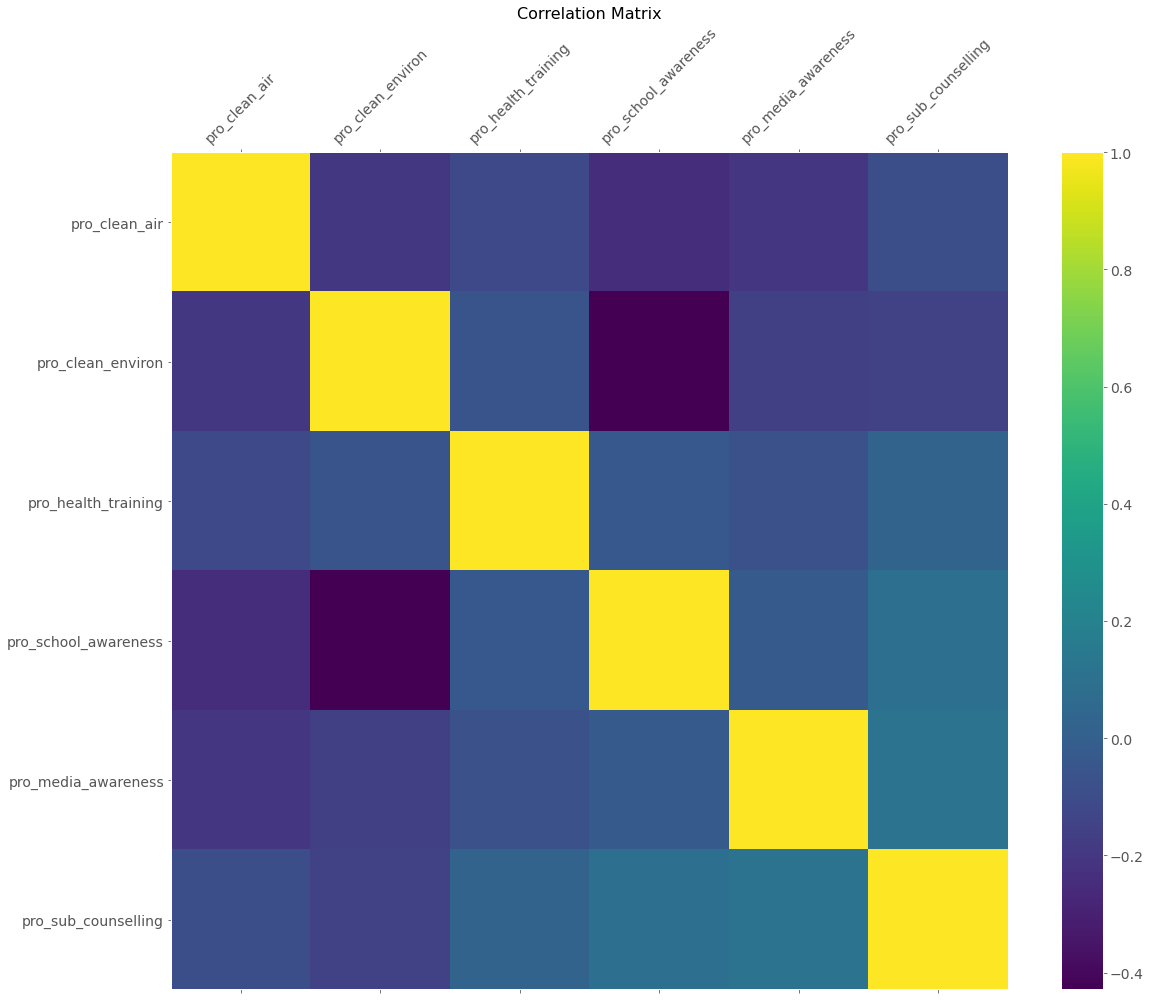

In [85]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df_independent.corr(), fignum=f.number)
plt.xticks(range(df_independent.shape[1]), df_independent.columns, fontsize=14, rotation=45)
plt.yticks(range(df_independent.shape[1]), df_independent.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Using VIF to deal with multicollinearity

Calculating VIF and dropping specific dataset if it is bigger than threshold(5)

In [9]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

Maximum VIF = 2.13 therefore there is nothing to drop

In [10]:
df_predictors_selected_VIF = drop_column_using_vif_(df_independent)
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['pro_clean_air', 'pro_clean_environ', 'pro_health_training',
       'pro_school_awareness', 'pro_media_awareness', 'pro_sub_counselling'],
      dtype='object')


## Multiple Regression

Assigning predictor and response variables

In [11]:
X_values = sm.add_constant(df_predictors_selected_VIF)
y_values = increase_rate_outliers1

In [12]:
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.112
Date:                Mon, 16 Nov 2020   Prob (F-statistic):             0.0554
Time:                        09:42:39   Log-Likelihood:                -674.36
No. Observations:                 149   AIC:                             1363.
Df Residuals:                     142   BIC:                             1384.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.2702 

## Creating Fitted vs Residuals Graphs

Checking LINE conditions of regression

pro_media_awareness

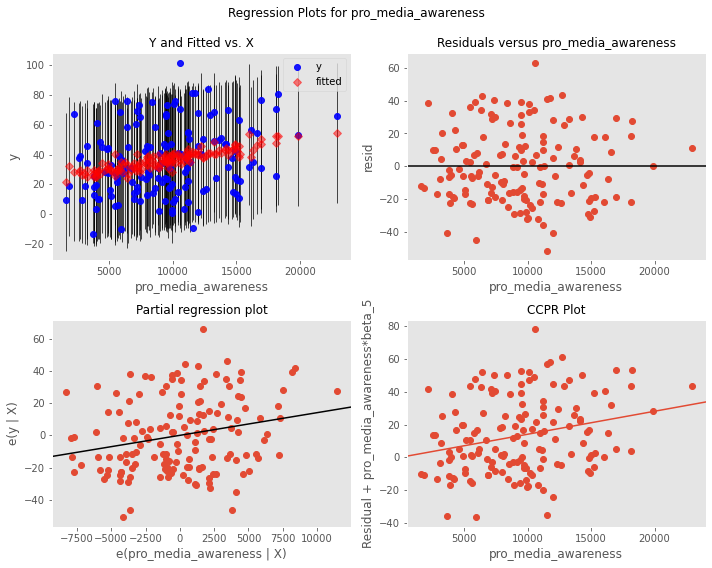

In [90]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_media_awareness', fig=fig)

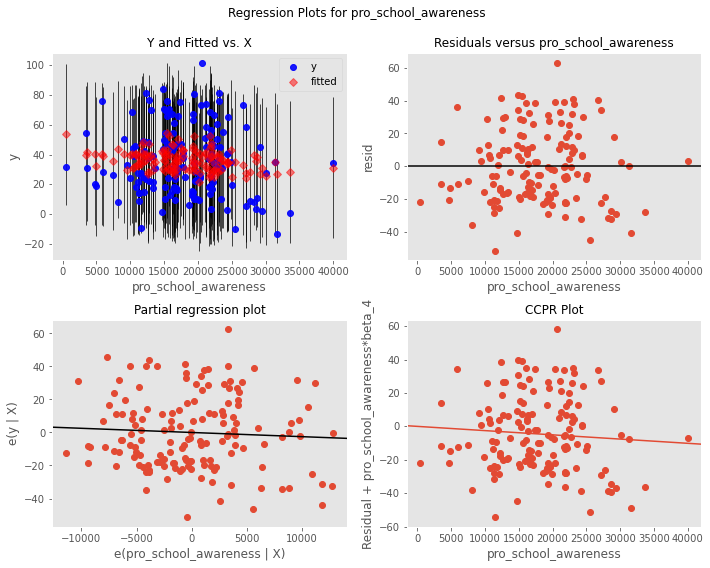

In [91]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_school_awareness', fig=fig)

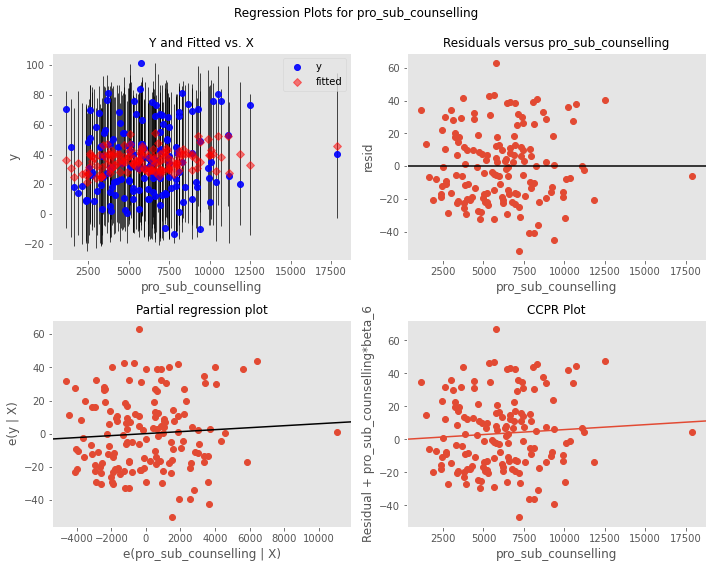

In [92]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_sub_counselling', fig=fig)

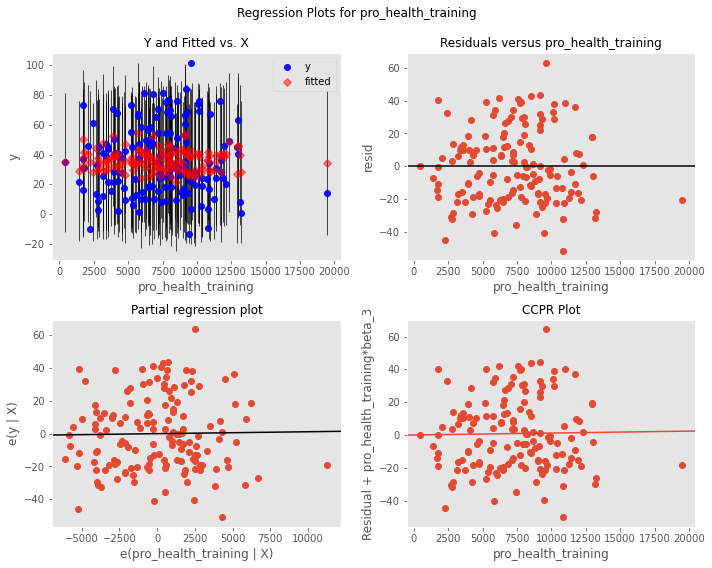

In [93]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_health_training', fig=fig)

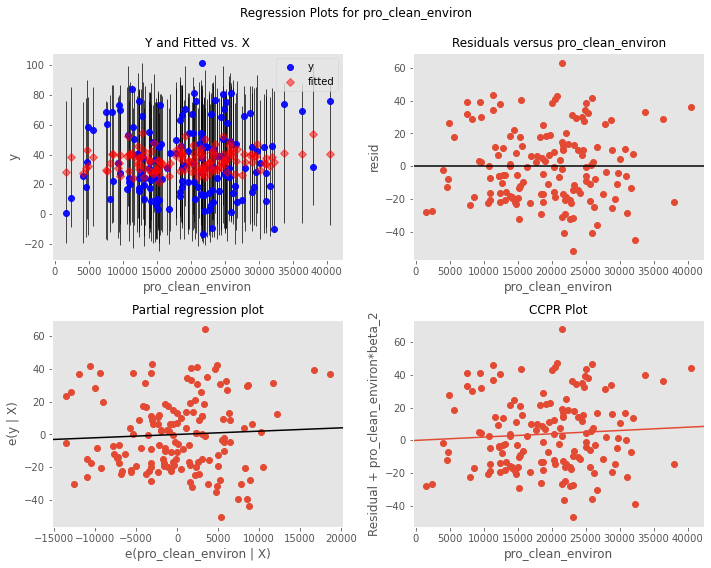

In [94]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_clean_environ', fig=fig)

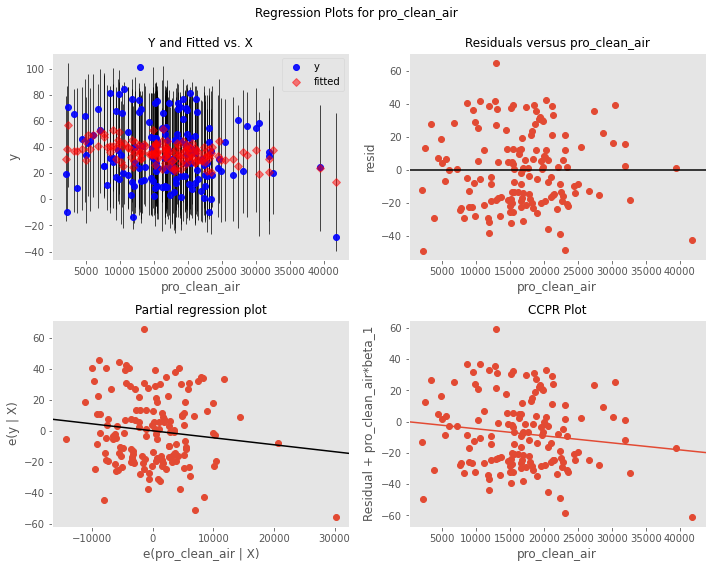

In [70]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'pro_clean_air', fig=fig)

# Linear Regression

I made linear regression for each variable also to see effect of correlation between variables

In [109]:
X_values_linear = sm.add_constant(pro_sub_counselling_outliers1)
y_values_linear= increase_rate_outliers1

In [110]:
regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9843
Date:                Mon, 16 Nov 2020   Prob (F-statistic):              0.323
Time:                        07:21:33   Log-Likelihood:                -680.24
No. Observations:                 149   AIC:                             1364.
Df Residuals:                     147   BIC:                             1370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7103      4.936      6.425      0.0

## Plotting data

To find and plot outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea01a00710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea01a00f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea01a00310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea01989890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea01989cd0>],
 'means': []}

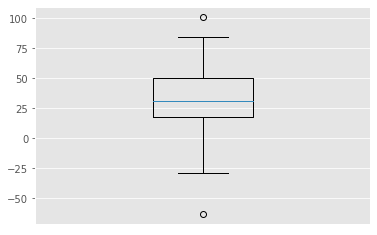

In [22]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(increase_rate, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea01a13350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea01a13bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea01a08f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea01a1c4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea01a1c910>],
 'means': []}

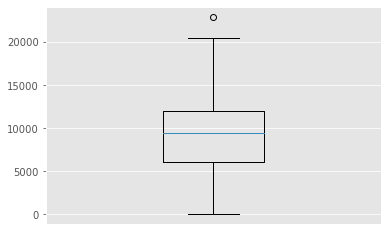

In [21]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_media_awareness, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62cd410810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62c50a2250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f62cd410410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62c5132550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62c51321d0>],
 'means': []}

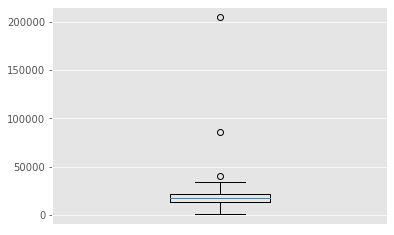

In [115]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_school_awareness, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62c502ee10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62cd562e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f62cd404b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62cd562550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62d01f9290>],
 'means': []}

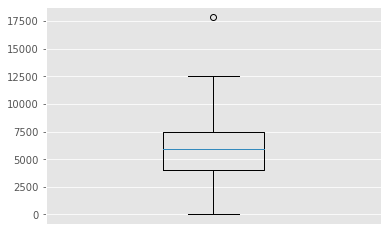

In [116]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_sub_counselling, manage_ticks=(False))

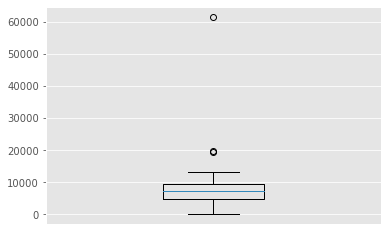

In [18]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_health_training, manage_ticks=(False))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62cf44ad50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62cd844d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f62cf44a910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62cd844dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62cd844610>],
 'means': []}

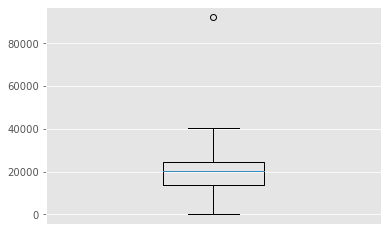

In [118]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_clean_environ, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea01a96e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea01a9c750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea01a96a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea01aa6050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea01aa6490>],
 'means': []}

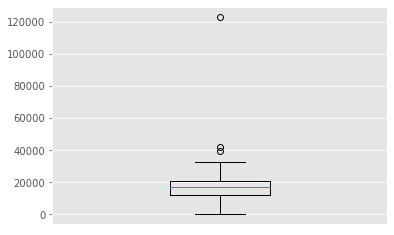

In [20]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(pro_clean_air, manage_ticks=(False))